# Machine Learning

(adapted from http://scipy-lectures.org/packages/scikit-learn/index.html)

## 1. scikit-learn

### contents

   - Introduction: problem settings
   - Basic principles of machine learning with scikit-learn
   - Supervised Learning: Classification of Handwritten Digits
   - Supervised Learning: Regression of Housing Data
   - Measuring prediction performance
   - Unsupervised Learning: Dimensionality Reduction and Visualization
   - The eigenfaces example: chaining PCA and SVMs
   - Parameter selection, Validation, and Testing




### Introduction: problem settings

#### What is machine learning?

Machine Learning is about building programs with tunable parameters that are adjusted automatically so as to improve their behavior by adapting to previously seen data.

Machine Learning can be considered a subfield of Artificial Intelligence since those algorithms can be seen as building blocks to make computers learn to behave more intelligently by somehow generalizing rather that just storing and retrieving data items like a database system would do.


##### A classification problem

We’ll take a look at two very simple machine learning tasks here. The first is a classification task: the figure shows a collection of two-dimensional data, colored according to two different class labels. A classification algorithm may be used to draw a dividing boundary between the two clusters of points:

By drawing this separating line, we have learned a model which can generalize to new data: if you were to drop another point onto the plane which is unlabeled, this algorithm could now predict whether it’s a blue or a red point.

![classification.png](../images/classification.png)


##### A regression problem

The next simple task we’ll look at is a regression task: a simple best-fit line to a set of data.

Again, this is an example of fitting a model to data, but our focus here is that the model can make generalizations about new data. The model has been learned from the training data, and can be used to predict the result of test data: here, we might be given an x-value, and the model would allow us to predict the y value.

![linearregression.png](../images/linearregression.png)

#### Data in scikit-learn

##### The data matrix

Machine learning algorithms implemented in scikit-learn expect data to be stored in a two-dimensional array or matrix. The arrays can be either numpy arrays, or in some cases scipy.sparse matrices. The size of the array is expected to be [n_samples, n_features]

* n_samples: The number of samples: each sample is an item to process (e.g. classify). A sample can be a document, a picture, a sound, a video, an astronomical object, a row in database or CSV file, or whatever you can describe with a fixed set of quantitative traits.
* n_features: The number of features or distinct traits that can be used to describe each item in a quantitative manner. Features are generally real-valued, but may be boolean or discrete-valued in some cases.

The number of features must be fixed in advance. However it can be very high dimensional (e.g. millions of features) with most of them being zeros for a given sample. This is a case where scipy.sparse matrices can be useful, in that they are much more memory-efficient than numpy arrays. 

##### A Simple Example: the Iris Dataset

###### The application problem

As an example of a simple dataset, let us a look at the iris data stored by scikit-learn. Suppose we want to recognize species of irises. The data consists of measurements of three different species of irises:
 	
####### Setosa Iris 		
![iris_setosa.jpg](../images/iris_setosa.jpg)
#######  Versicolor Iris 
![iris_versicolor.jpg](../images/iris_versicolor.jpg)
#######  Virginica Iris
![iris_virginica.jpg](../images/iris_virginica.jpg)

###### Loading the Iris Data with Scikit-learn

Scikit-learn has a very straightforward set of data on these iris species. The data consist of the following:

* Features in the Iris dataset:
        sepal length (cm), sepal width (cm), petal length (cm), petal width (cm) 
* Target classes to predict:
        Setosa, Versicolour, Virginica 

scikit-learn embeds a copy of the iris CSV file along with a function to load it into numpy arrays:

**Note**

scikit-learn is imported as sklearn 

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
print(iris.data.shape)
n_samples, n_features = iris.data.shape

(150, 4)


In [3]:
print(iris.data[0])

[ 5.1  3.5  1.4  0.2]


In [4]:
# The information about the class of each sample is stored in the target attribute of the dataset:
print(iris.target.shape)

(150,)


In [5]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [6]:
# The names of the classes are stored in the last attribute, namely target_names:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


This data is four-dimensional, but we can visualize two of the dimensions at a time using a scatter plot:

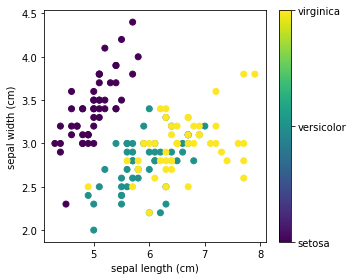

In [7]:
from matplotlib import pyplot as plt

# The indices of the features that we are plotting
x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

### Basic principles of machine learning with scikit-learn

#### Introducing the scikit-learn estimator object

Every algorithm is exposed in scikit-learn via an ‘’Estimator’’ object. For instance a linear regression is: sklearn.linear_model.LinearRegression

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
# Estimator parameters: All the parameters of an estimator can be set when it is instantiated:

model = LinearRegression(normalize=True)
print(model.normalize)

True


In [10]:
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)


##### Fitting on data

Let’s create some simple data with numpy:

In [12]:
import numpy as np

x = np.array([0, 1, 2])
y = np.array([0, 1, 2])
X = x[:, np.newaxis] # The input data for sklearn is 2D: (samples == 3 x features == 1)
X

array([[0],
       [1],
       [2]])

In [13]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [14]:
# Estimated parameters: When data is fitted with an estimator, parameters are estimated 
# from the data at hand. All the estimated parameters are attributes of the estimator 
# object ending by an underscore:

model.coef_

array([ 1.])

#### Supervised Learning: Classification and regression

In Supervised Learning, we have a dataset consisting of both features and labels. The task is to construct an estimator which is able to predict the label of an object given the set of features. A relatively simple example is predicting the species of iris given a set of measurements of its flower. This is a relatively simple task. Some more complicated examples are:

* given a multicolor image of an object through a telescope, determine whether that object is a star, a quasar, or a galaxy.
* given a photograph of a person, identify the person in the photo.
* given a list of movies a person has watched and their personal rating of the movie, recommend a list of movies they would like (So-called recommender systems: a famous example is the Netflix Prize).

What these tasks have in common is that there is one or more unknown quantities associated with the object which needs to be determined from other observed quantities.

Supervised learning is further broken down into two categories, classification and regression. In classification, the label is discrete, while in regression, the label is continuous. For example, in astronomy, the task of determining whether an object is a star, a galaxy, or a quasar is a classification problem: the label is from three distinct categories. On the other hand, we might wish to estimate the age of an object based on such observations: this would be a regression problem, because the label (age) is a continuous quantity.

**Classification** : K nearest neighbors (kNN) is one of the simplest learning strategies: given a new, unknown observation, look up in your reference database which ones have the closest features and assign the predominant class. Let’s try it out on our iris classification problem:



In [15]:
from sklearn import neighbors, datasets
iris = datasets.load_iris()
X, y = iris.data, iris.target
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
# What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?
print(iris.target_names[knn.predict([[3, 5, 4, 2]])])


['virginica']


In [24]:
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap

# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                    # avoid this ugly slicing by using a two-dim dataset
y = iris.target

knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

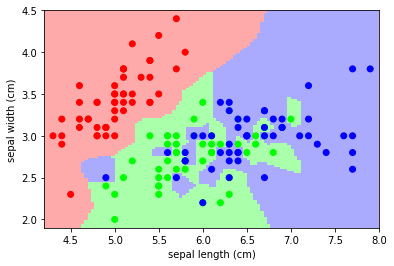

In [25]:
# Put the result into a color plot

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')

plt.show()

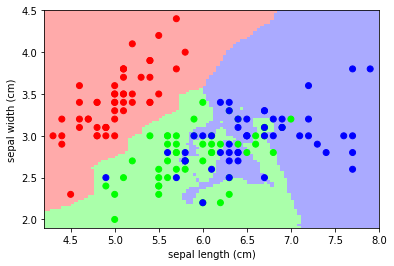

In [26]:
# And now, redo the analysis with 3 neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')

plt.show()

Classification using simulated data

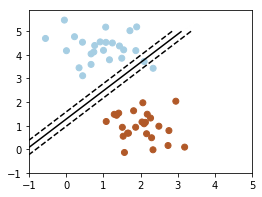

In [27]:
from sklearn.linear_model import SGDClassifier
from sklearn.datasets.samples_generator import make_blobs

# we create 50 separable synthetic points
X, Y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

# fit the model
clf = SGDClassifier(loss="hinge", alpha=0.01,
                    max_iter=1000, tol=0.1, fit_intercept=True)
clf.fit(X, Y)

# plot the line, the points, and the nearest vectors to the plane
xx = np.linspace(-1, 5, 10)
yy = np.linspace(-1, 5, 10)

X1, X2 = np.meshgrid(xx, yy)
Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = clf.decision_function([[x1, x2]])
    Z[i, j] = p[0]

plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.contour(X1, X2, Z, [-1.0, 0.0, 1.0], colors='k',
           linestyles=['dashed', 'solid', 'dashed'])
ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

ax.axis('tight')


plt.show()

**Regression** : The simplest possible regression setting is the linear regression one:

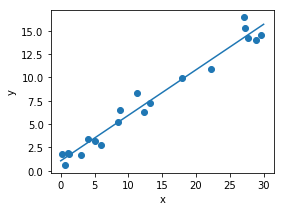

In [28]:
from sklearn.linear_model import LinearRegression

# x from 0 to 30
x = 30 * np.random.random((20, 1))

# y = a*x + b with noise
y = 0.5 * x + 1.0 + np.random.normal(size=x.shape)

# create a linear regression model
model = LinearRegression()
model.fit(x, y)

# predict y from the data
x_new = np.linspace(0, 30, 100)
y_new = model.predict(x_new[:, np.newaxis])

# plot the results
plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.scatter(x, y)
ax.plot(x_new, y_new)

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.axis('tight')


plt.show()

#### A recap on Scikit-learn’s estimator interface

Scikit-learn strives to have a uniform interface across all methods, and we’ll see examples of these below. Given a scikit-learn estimator object named model, the following methods are available:

#####  In all Estimators:
 	
* model.fit() : fit training data. For supervised learning applications, this accepts two arguments: the data X and the labels y (e.g. model.fit(X, y)). For unsupervised learning applications, this accepts only a single argument, the data X (e.g. model.fit(X)).

##### In supervised estimators:
 	
* model.predict() : given a trained model, predict the label of a new set of data. This method accepts one argument, the new data X_new (e.g. model.predict(X_new)), and returns the learned label for each object in the array.

* model.predict_proba() : For classification problems, some estimators also provide this method, which returns the probability that a new observation has each categorical label. In this case, the label with the highest probability is returned by model.predict().

* model.score() : for classification or regression problems, most (all?) estimators implement a score method. Scores are between 0 and 1, with a larger score indicating a better fit.

##### In unsupervised estimators:

* model.transform() : given an unsupervised model, transform new data into the new basis. This also accepts one argument X_new, and returns the new representation of the data based on the unsupervised model.

* model.fit_transform() : some estimators implement this method, which more efficiently performs a fit and a transform on the same input data.


#### Regularization: what it is and why it is necessary

##### Prefering simpler models

**Train errors** Suppose you are using a 1-nearest neighbor estimator. How many errors do you expect on your train set?

* Train set error is not a good measurement of prediction performance. You need to leave out a test set.
* In general, we should accept errors on the train set.

**An example of regularization** The core idea behind regularization is that we are going to prefer models that are simpler, for a certain definition of ‘’simpler’‘, even if they lead to more errors on the train set.

As an example, let’s generate with a 9th order polynomial, with noise:

In [29]:
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn import linear_model

# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


rng = np.random.RandomState(0)
x = 2*rng.rand(100) - 1

f = lambda t: 1.2 * t**2 + .1 * t**3 - .4 * t **5 - .5 * t ** 9
y = f(x) + .4 * rng.normal(size=100)

x_test = np.linspace(-1, 1, 100)



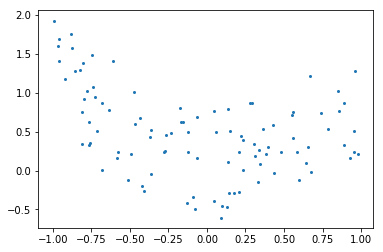

In [33]:
# The data

plt.figure(figsize=(6, 4))
plt.scatter(x, y, s=4)


plt.show()

And now, let’s fit a 4th order and a 9th order polynomial to the data.
For this we need to engineer features: the n_th powers of x:



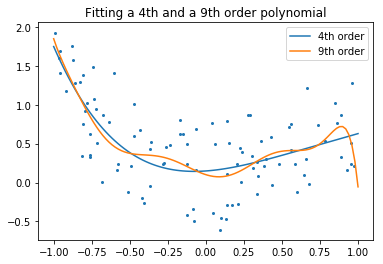

In [34]:
plt.figure(figsize=(6, 4))
plt.scatter(x, y, s=4)

X = np.array([x**i for i in range(5)]).T
X_test = np.array([x_test**i for i in range(5)]).T
regr = linear_model.LinearRegression()
regr.fit(X, y)
plt.plot(x_test, regr.predict(X_test), label='4th order')

X = np.array([x**i for i in range(10)]).T
X_test = np.array([x_test**i for i in range(10)]).T
regr = linear_model.LinearRegression()
regr.fit(X, y)
plt.plot(x_test, regr.predict(X_test), label='9th order')

plt.legend(loc='best')
plt.axis('tight')
plt.title('Fitting a 4th and a 9th order polynomial')

plt.show()

With your naked eyes, which model do you prefer, the 4th order one, or the 9th order one?
Let’s look at the **ground truth**:

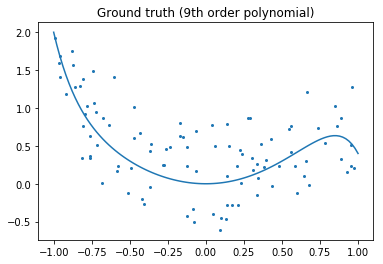

In [35]:
plt.figure(figsize=(6, 4))
plt.scatter(x, y, s=4)
plt.plot(x_test, f(x_test), label="truth")
plt.axis('tight')
plt.title('Ground truth (9th order polynomial)')

plt.show()

Regularization is ubiquitous in machine learning. Most scikit-learn estimators have a parameter to tune the amount of regularization. For instance, with k-NN, it is ‘k’, the number of nearest neighbors used to make the decision. k=1 amounts to no regularization: 0 error on the training set, whereas large k will push toward smoother decision boundaries in the feature space.

##### Simple versus complex models for classification

###### data that is linearly separable

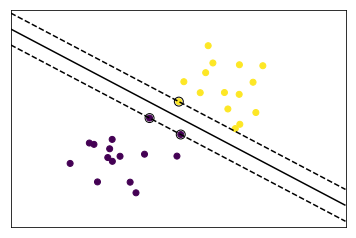

In [36]:
from sklearn import svm

def linear_model(rseed=42, n_samples=30):
    " Generate data according to a linear model"
    np.random.seed(rseed)

    data = np.random.normal(0, 10, (n_samples, 2))
    data[:n_samples // 2] -= 15
    data[n_samples // 2:] += 15

    labels = np.ones(n_samples)
    labels[:n_samples // 2] = -1

    return data, labels


X, y = linear_model()
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

plt.figure(figsize=(6, 4))
ax = plt.subplot(111, xticks=[], yticks=[])
ax.scatter(X[:, 0], X[:, 1], c=y-np.min(y))

ax.scatter(clf.support_vectors_[:, 0],
            clf.support_vectors_[:, 1],
            s=80, edgecolors="k", facecolors="none")

delta = 1
y_min, y_max = -50, 50
x_min, x_max = -50, 50
x = np.arange(x_min, x_max + delta, delta)
y = np.arange(y_min, y_max + delta, delta)
X1, X2 = np.meshgrid(x, y)
Z = clf.decision_function(np.c_[X1.ravel(), X2.ravel()])
Z = Z.reshape(X1.shape)

ax.contour(X1, X2, Z, [-1.0, 0.0, 1.0], colors='k',
           linestyles=['dashed', 'solid', 'dashed'])
plt.show()

###### data with a non-linear separation

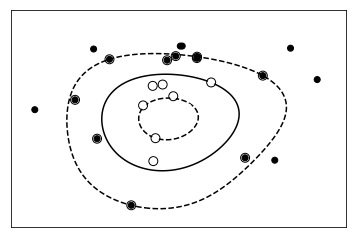

In [37]:


def nonlinear_model(rseed=42, n_samples=30):
    radius = 40 * np.random.random(n_samples)
    far_pts = radius > 20
    radius[far_pts] *= 1.2
    radius[~far_pts] *= 1.1

    theta = np.random.random(n_samples) * np.pi * 2

    data = np.empty((n_samples, 2))
    data[:, 0] = radius * np.cos(theta)
    data[:, 1] = radius * np.sin(theta)

    labels = np.ones(n_samples)
    labels[far_pts] = -1

    return data, labels


X, y = nonlinear_model()
clf = svm.SVC(kernel='rbf', gamma=0.001, coef0=0, degree=3)
clf.fit(X, y)

plt.figure(figsize=(6, 4))
ax = plt.subplot(1, 1, 1, xticks=[], yticks=[])
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bone, zorder=2)

ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
           s=80, edgecolors="k", facecolors="none")

delta = 1
y_min, y_max = -50, 50
x_min, x_max = -50, 50
x = np.arange(x_min, x_max + delta, delta)
y = np.arange(y_min, y_max + delta, delta)
X1, X2 = np.meshgrid(x, y)
Z = clf.decision_function(np.c_[X1.ravel(), X2.ravel()])
Z = Z.reshape(X1.shape)

ax.contour(X1, X2, Z, [-1.0, 0.0, 1.0], colors='k',
            linestyles=['dashed', 'solid', 'dashed'], zorder=1)

plt.show()

For classification models, the decision boundary, that separates the class expresses the complexity of the model. For instance, a linear model, that makes a decision based on a linear combination of features, is more complex than a non-linear one.

### Supervised Learning: Classification of Handwritten Digits

#### The nature of the data

In this section we’ll apply scikit-learn to the classification of handwritten digits. This will go a bit beyond the iris classification we saw before: we’ll discuss some of the metrics which can be used in evaluating the effectiveness of a classification model.

Plot the first few samples of the digits dataset and a 2D representation built using PCA, then do a simple classification

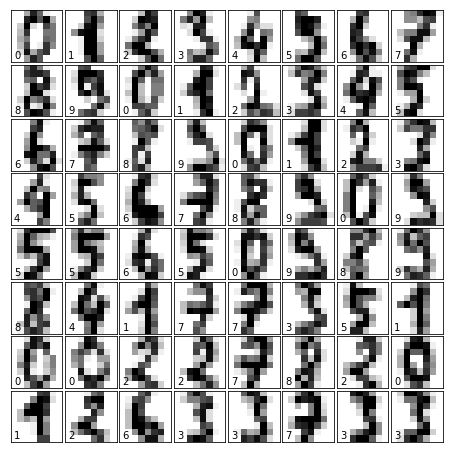

In [41]:
from sklearn.datasets import load_digits

digits = load_digits()

fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))
    
plt.show()

#### Visualizing the Data on its principal components

A good first-step for many problems is to visualize the data using a Dimensionality Reduction technique. We’ll start with the most straightforward one, Principal Component Analysis (PCA).

PCA seeks orthogonal linear combinations of the features which show the greatest variance, and as such, can help give you a good idea of the structure of the data set.

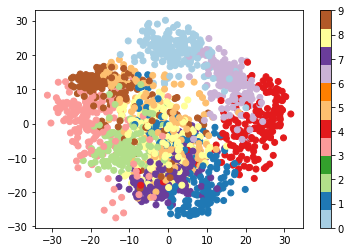

In [42]:
# Plot a projection on the 2 first principal axis

plt.figure()

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
proj = pca.fit_transform(digits.data)
plt.scatter(proj[:, 0], proj[:, 1], c=digits.target, cmap="Paired")
plt.colorbar()

plt.show()

#### Gaussian Naive Bayes Classification

For most classification problems, it’s nice to have a simple, fast method to provide a quick baseline classification. If the simple and fast method is sufficient, then we don’t have to waste CPU cycles on more complex models. If not, we can use the results of the simple method to give us clues about our data.

One good method to keep in mind is Gaussian Naive Bayes (sklearn.naive_bayes.GaussianNB).

Gaussian Naive Bayes fits a Gaussian distribution to each training label independantly on each feature, and uses this to quickly give a rough classification. It is generally not sufficiently accurate for real-world data, but can perform surprisingly well, for instance on text data. 

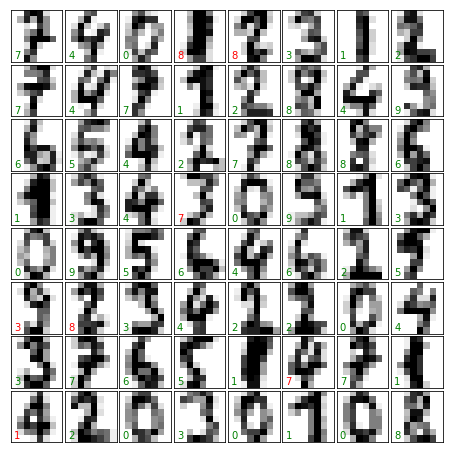

In [43]:
# Classify with Gaussian naive Bayes

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

# train the model
clf = GaussianNB()
clf.fit(X_train, y_train)

# use the model to predict the labels of the test data
predicted = clf.predict(X_test)
expected = y_test

# Plot the prediction
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test.reshape(-1, 8, 8)[i], cmap=plt.cm.binary,
              interpolation='nearest')

    # label the image with the target value
    if predicted[i] == expected[i]:
        ax.text(0, 7, str(predicted[i]), color='green')
    else:
        ax.text(0, 7, str(predicted[i]), color='red')

plt.show()

#### Quantitative Measurement of Performance

We’d like to measure the performance of our estimator without having to resort to plotting examples. A simple method might be to simply compare the number of matches:

In [44]:
matches = (predicted == expected)
print(matches.sum())

385


In [45]:
print(len(matches))

450


In [46]:
matches.sum() / float(len(matches))

0.85555555555555551

We see that more than 80% of the 450 predictions match the input. But there are other more sophisticated metrics that can be used to judge the performance of a classifier: several are available in the sklearn.metrics submodule.

One of the most useful metrics is the classification_report, which combines several measures and prints a table with the results:

In [47]:
from sklearn import metrics
print(metrics.classification_report(expected, predicted))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98        51
          1       0.90      0.86      0.88        43
          2       0.97      0.70      0.81        43
          3       0.91      0.89      0.90        45
          4       0.97      0.70      0.81        47
          5       0.97      0.95      0.96        40
          6       0.96      0.98      0.97        54
          7       0.64      1.00      0.78        46
          8       0.51      0.83      0.63        30
          9       0.97      0.65      0.78        51

avg / total       0.89      0.86      0.86       450



Another enlightening metric for this sort of multi-label classification is a **confusion matrix**: it helps us visualize which labels are being interchanged in the classification errors:

In [48]:
print(metrics.confusion_matrix(expected, predicted))

[[50  0  0  0  0  0  0  1  0  0]
 [ 0 37  0  0  0  0  1  0  4  1]
 [ 0  0 30  1  0  0  1  0 11  0]
 [ 0  0  1 40  0  0  0  3  1  0]
 [ 1  1  0  0 33  0  0 11  1  0]
 [ 0  0  0  0  0 38  0  2  0  0]
 [ 0  0  0  0  0  1 53  0  0  0]
 [ 0  0  0  0  0  0  0 46  0  0]
 [ 0  1  0  0  0  0  0  4 25  0]
 [ 0  2  0  3  1  0  0  5  7 33]]


We see here that in particular, the numbers 1, 2, 3, and 9 are often being labeled 8.

### Supervised Learning: Regression of Housing Data

Here we’ll do a short example of a regression problem: learning a continuous value from a set of features.

#### A quick look at the data

We’ll use the simple Boston house prices set, available in scikit-learn. This records measurements of 13 attributes of housing markets around Boston, as well as the median price. The question is: can you predict the price of a new market given its attributes?:

In [49]:
from sklearn.datasets import load_boston

data = load_boston()
print(data.data.shape)

(506, 13)


In [50]:
print(data.target.shape)

(506,)


We can see that there are just over 500 data points.

The DESCR variable has a long description of the dataset:

In [51]:
print(data.DESCR) 

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

It often helps to quickly visualize pieces of the data using histograms, scatter plots, or other plot types. With pylab, let us show a histogram of the target values: the median price in each neighborhood:


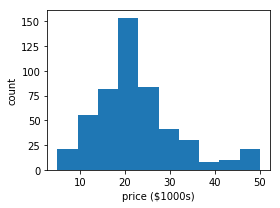

In [54]:
plt.figure(figsize=(4, 3))
plt.hist(data.target)
plt.xlabel('price ($1000s)')
plt.ylabel('count')
plt.tight_layout() 

plt.show()

Let’s have a quick look to see if some features are more relevant than others for our problem:

C:\Users\john\Anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


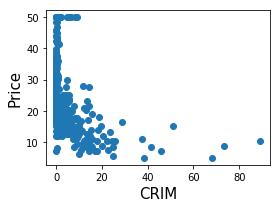

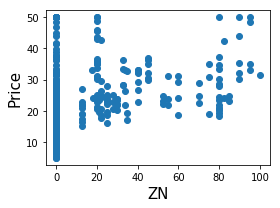

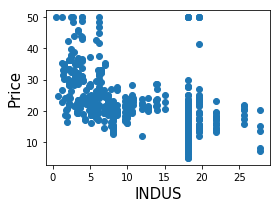

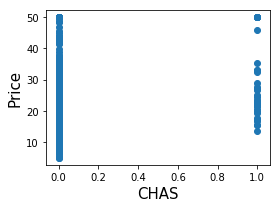

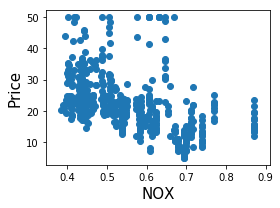

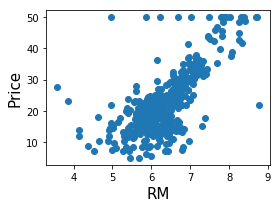

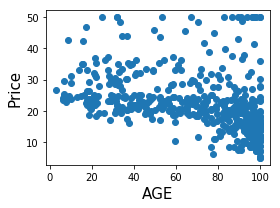

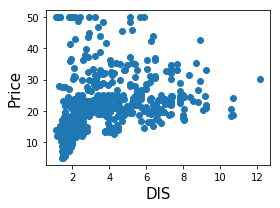

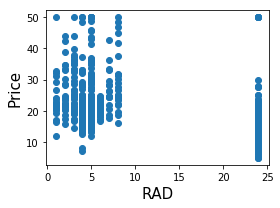

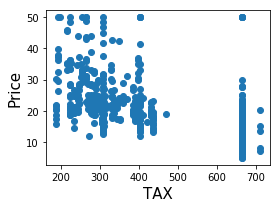

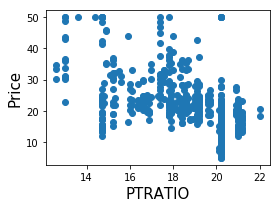

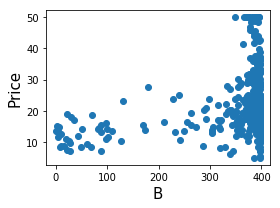

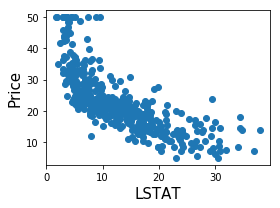

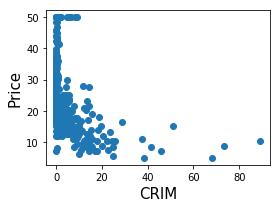

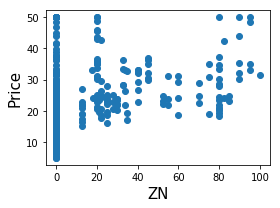

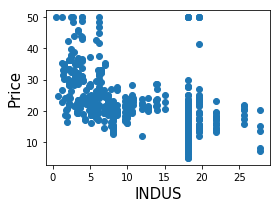

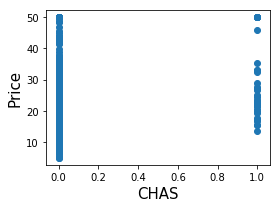

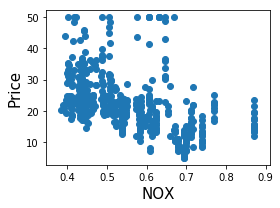

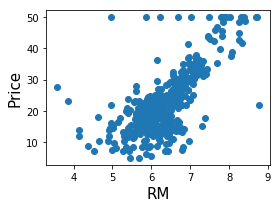

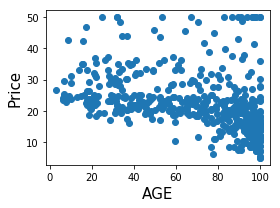

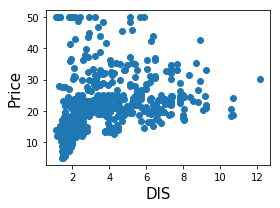

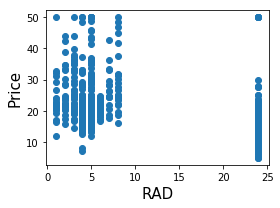

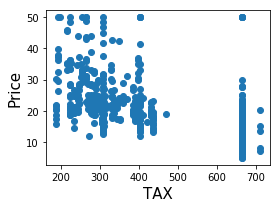

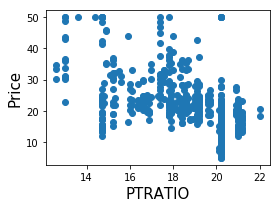

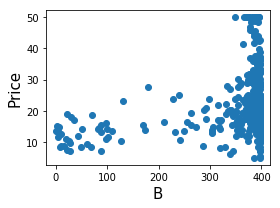

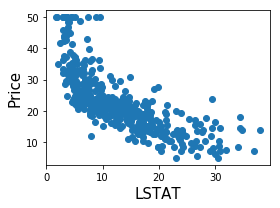

In [56]:
#Print the join histogram for each feature

for index, feature_name in enumerate(data.feature_names):
    plt.figure(figsize=(4, 3))
    plt.scatter(data.data[:, index], data.target)
    plt.ylabel('Price', size=15)
    plt.xlabel(feature_name, size=15)
    plt.tight_layout()

plt.show()

This is a manual version of a technique called **feature selection**.

Sometimes, in Machine Learning it is useful to use feature selection to decide which features are the most useful for a particular problem. Automated methods exist which quantify this sort of exercise of choosing the most informative features. 

#### Predicting Home Prices: a Simple Linear Regression

Now we’ll use scikit-learn to perform a simple linear regression on the housing data. There are many possibilities of regressors to use. A particularly simple one is LinearRegression: this is basically a wrapper around an ordinary least squares calculation.

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

from sklearn.linear_model import LinearRegression

clf = LinearRegression()

clf.fit(X_train, y_train)


predicted = clf.predict(X_test)

expected = y_test

print("RMS: %s" % np.sqrt(np.mean((predicted - expected) ** 2))) 

RMS: 4.55407037425


We can plot the error: expected as a function of predicted:

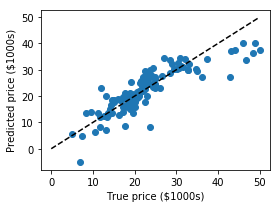

In [60]:
plt.figure(figsize=(4, 3))
plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()

plt.show()

The prediction at least correlates with the true price, though there are clearly some biases. We could imagine evaluating the performance of the regressor by, say, computing the RMS residuals between the true and predicted price. There are some subtleties in this, however, which we’ll cover in a later section.

There are many other types of regressors available in scikit-learn: we’ll try a more powerful one here.

Use the GradientBoostingRegressor class to fit the housing data.

RMS: 2.7162872154701612 


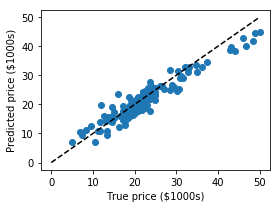

In [61]:
# Prediction with gradient boosted tree

from sklearn.ensemble import GradientBoostingRegressor

clf = GradientBoostingRegressor()
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)
expected = y_test

print("RMS: %r " % np.sqrt(np.mean((predicted - expected) ** 2)))

plt.figure(figsize=(4, 3))
plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()

plt.show()

### Measuring prediction performance

#### A quick test on the K-neighbors classifier

Here we’ll continue to look at the digits data, but we’ll switch to the K-Neighbors classifier. The K-neighbors classifier is an instance-based classifier. The K-neighbors classifier predicts the label of an unknown point based on the labels of the K nearest points in the parameter space.

In [62]:
# Get the data

from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
y = digits.target

# Instantiate and train the classifier
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y) 

# Check the results using metrics
from sklearn import metrics

y_pred = clf.predict(X)

print(metrics.confusion_matrix(y_pred, y))

[[178   0   0   0   0   0   0   0   0   0]
 [  0 182   0   0   0   0   0   0   0   0]
 [  0   0 177   0   0   0   0   0   0   0]
 [  0   0   0 183   0   0   0   0   0   0]
 [  0   0   0   0 181   0   0   0   0   0]
 [  0   0   0   0   0 182   0   0   0   0]
 [  0   0   0   0   0   0 181   0   0   0]
 [  0   0   0   0   0   0   0 179   0   0]
 [  0   0   0   0   0   0   0   0 174   0]
 [  0   0   0   0   0   0   0   0   0 180]]


Apparently, we’ve found a perfect classifier! But this is misleading for the reasons we saw before: the classifier essentially “memorizes” all the samples it has already seen. To really test how well this algorithm does, we need to try some samples it hasn’t yet seen.

This problem also occurs with regression models. In the following we fit an other instance-based model named “decision tree” to the Boston Housing price dataset we introduced previously:

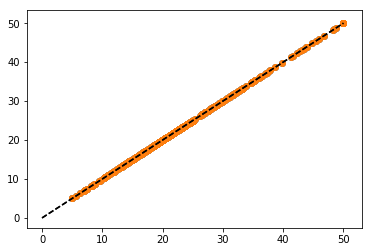

In [64]:
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor

data = load_boston()
clf = DecisionTreeRegressor().fit(data.data, data.target)
predicted = clf.predict(data.data)

expected = data.target
plt.scatter(expected, predicted) 
plt.plot([0, 50], [0, 50], '--k') 

plt.show()

Here again the predictions are seemingly perfect as the model was able to perfectly memorize the training set.

#### A correct approach: Using a validation set

Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data.

To avoid over-fitting, we have to define two different sets:

* a training set X_train, y_train which is used for learning the parameters of a predictive model
* a testing set X_test, y_test which is used for evaluating the fitted predictive model

In scikit-learn such a random split can be quickly computed with the train_test_split() function:

In [65]:
from sklearn import model_selection

X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                                        test_size=0.25, random_state=0)

print("%r, %r, %r" % (X.shape, X_train.shape, X_test.shape))

(1797, 64), (1347, 64), (450, 64)


Now we train on the training data, and test on the testing data:



In [66]:
clf = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(metrics.confusion_matrix(y_test, y_pred))


[[37  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  0  0]
 [ 0  0 43  1  0  0  0  0  0  0]
 [ 0  0  0 45  0  0  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  0]
 [ 0  0  0  0  0  0  0  0 48  0]
 [ 0  0  0  1  0  1  0  0  0 45]]


In [67]:
print(metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        37
          1       1.00      1.00      1.00        43
          2       1.00      0.98      0.99        44
          3       0.96      1.00      0.98        45
          4       1.00      1.00      1.00        38
          5       0.98      0.98      0.98        48
          6       1.00      1.00      1.00        52
          7       1.00      1.00      1.00        48
          8       1.00      1.00      1.00        48
          9       0.98      0.96      0.97        47

avg / total       0.99      0.99      0.99       450



The averaged f1-score is often used as a convenient measure of the overall performance of an algorithm. It appears in the bottom row of the classification report; it can also be accessed directly:

In [68]:
metrics.f1_score(y_test, y_pred, average="macro")

0.99136752188421906

The over-fitting we saw previously can be quantified by computing the f1-score on the training data itself:

In [69]:
metrics.f1_score(y_train, clf.predict(X_train), average="macro")

1.0



**Note**

Regression metrics In the case of regression models, we need to use different metrics, such as explained variance. 

#### Model Selection via Validation

We have applied Gaussian Naives, support vectors machines, and K-nearest neighbors classifiers to the digits dataset. Now that we have these validation tools in place, we can ask quantitatively which of the three estimators works best for this dataset.

* With the default hyper-parameters for each estimator, which gives the best f1 score on the validation set? Recall that hyperparameters are the parameters set when you instantiate the classifier: for example, the n_neighbors in clf = KNeighborsClassifier(n_neighbors=1)

In [70]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                            test_size=0.25, random_state=0)

for Model in [GaussianNB, KNeighborsClassifier, LinearSVC]:
    clf = Model().fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('%s: %s' %
          (Model.__name__, metrics.f1_score(y_test, y_pred, average="macro")))  

GaussianNB: 0.833274168101
KNeighborsClassifier: 0.980456280495
LinearSVC: 0.9302270669


* For each classifier, which value for the hyperparameters gives the best results for the digits data? For LinearSVC, use loss='l2' and loss='l1'. For KNeighborsClassifier we use n_neighbors between 1 and 10. Note that GaussianNB does not have any adjustable hyperparameters.

In [71]:
# test SVC loss 
# (loss='l1' has been deprecated in favor of loss='hinge')
# (loss='l2' has been deprecated in favor of loss='squared_hinge')
for loss in ['hinge', 'squared_hinge']:
    clf = LinearSVC(loss=loss).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("LinearSVC(loss='{0}'): {1}".format(loss,
          metrics.f1_score(y_test, y_pred, average="macro")))

print('-------------------')

# test the number of neighbors
for n_neighbors in range(1, 11):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("KNeighbors(n_neighbors={0}): {1}".format(n_neighbors,
        metrics.f1_score(y_test, y_pred, average="macro")))

LinearSVC(loss='hinge'): 0.93403066522661
LinearSVC(loss='squared_hinge'): 0.9406366078254852
-------------------
KNeighbors(n_neighbors=1): 0.9913675218842191
KNeighbors(n_neighbors=2): 0.9848442068835102
KNeighbors(n_neighbors=3): 0.9867753449543099
KNeighbors(n_neighbors=4): 0.9803719053818863
KNeighbors(n_neighbors=5): 0.9804562804949924
KNeighbors(n_neighbors=6): 0.9757924194139573
KNeighbors(n_neighbors=7): 0.9780645792142071
KNeighbors(n_neighbors=8): 0.9780645792142071
KNeighbors(n_neighbors=9): 0.9780645792142071
KNeighbors(n_neighbors=10): 0.9755550897728812


#### Cross-validation

Cross-validation consists in repetively splitting the data in pairs of train and test sets, called ‘folds’. Scikit-learn comes with a function to automatically compute score on all these folds. Here we do KFold with k=5.

In [72]:
clf = KNeighborsClassifier()

from sklearn.model_selection import cross_val_score

cross_val_score(clf, X, y, cv=5)

array([ 0.9478022 ,  0.9558011 ,  0.96657382,  0.98039216,  0.96338028])

We can use different splitting strategies, such as random splitting:

In [73]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=5)

cross_val_score(clf, X, y, cv=cv) 

array([ 0.98888889,  0.98888889,  0.98333333,  0.97777778,  0.99444444])

There exists many different cross-validation strategies in scikit-learn. They are often useful to take in account non iid datasets.

#### Hyperparameter optimization with cross-validation

Consider regularized linear models, such as Ridge Regression, which uses l2 regularlization, and Lasso Regression, which uses l1 regularization. Choosing their regularization parameter is important.

Let us set these parameters on the Diabetes dataset, a simple regression problem. The diabetes data consists of 10 physiological variables (age, sex, weight, blood pressure) measure on 442 patients, and an indication of disease progression after one year:

In [74]:
from sklearn.datasets import load_diabetes

data = load_diabetes()
X, y = data.data, data.target
print(X.shape)

(442, 10)


With the default hyper-parameters: we compute the cross-validation score:


In [75]:
from sklearn.linear_model import Ridge, Lasso

for Model in [Ridge, Lasso]:
    model = Model()
    print('%s: %s' % (Model.__name__, cross_val_score(model, X, y).mean()))

Ridge: 0.409427438303
Lasso: 0.353800083299


##### Basic Hyperparameter Optimization

We compute the cross-validation score as a function of alpha, the strength of the regularization for Lasso and Ridge. We choose 20 values of alpha between 0.0001 and 1:

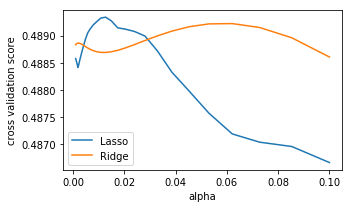

In [76]:
alphas = np.logspace(-3, -1, 30)

plt.figure(figsize=(5, 3))

for Model in [Lasso, Ridge]:
    scores = [cross_val_score(Model(alpha), X, y, cv=3).mean()
            for alpha in alphas]
    plt.plot(alphas, scores, label=Model.__name__)

plt.legend(loc='lower left')
plt.xlabel('alpha')
plt.ylabel('cross validation score')
plt.tight_layout()

plt.show()

##### Automatically Performing Grid Search

sklearn.grid_search.GridSearchCV is constructed with an estimator, as well as a dictionary of parameter values to be searched. We can find the optimal parameters this way:

In [77]:
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-3, -1, 30)

for Model in [Ridge, Lasso]:
    gscv = GridSearchCV(Model(), dict(alpha=alphas), cv=3).fit(X, y)
    print('%s: %s' % (Model.__name__, gscv.best_params_))

Ridge: {'alpha': 0.062101694189156162}
Lasso: {'alpha': 0.01268961003167922}


##### Built-in Hyperparameter Search

For some models within scikit-learn, cross-validation can be performed more efficiently on large datasets. In this case, a cross-validated version of the particular model is included. The cross-validated versions of Ridge and Lasso are RidgeCV and LassoCV, respectively. Parameter search on these estimators can be performed as follows:

In [78]:
from sklearn.linear_model import RidgeCV, LassoCV

alphas = np.logspace(-3, -1, 30)

for Model in [RidgeCV, LassoCV]:
    model = Model(alphas=alphas, cv=3).fit(X, y)
    print('%s: %s' % (Model.__name__, model.alpha_))

RidgeCV: 0.0621016941892
LassoCV: 0.0126896100317


##### Nested cross-validation

How do we measure the performance of these estimators? We have used data to set the hyperparameters, so we need to test on actually new data. We can do this by running cross_val_score() on our CV objects. Here there are 2 cross-validation loops going on, this is called ‘nested cross validation’:

In [79]:
for Model in [RidgeCV, LassoCV]:
    scores = cross_val_score(Model(alphas=alphas, cv=3), X, y, cv=3)
    print(Model.__name__, np.mean(scores))

RidgeCV 0.48916142455
LassoCV 0.485491396686


**Note**

Note that these results do not match the best results of our curves above, and LassoCV seems to under-perform RidgeCV. The reason is that setting the hyper-parameter is harder for Lasso, thus the estimation error on this hyper-parameter is larger. 

### Unsupervised Learning: Dimensionality Reduction and Visualization

Unsupervised learning is applied on X without y: data without labels. A typical use case is to find hidden structure in the data.

#### Dimensionality Reduction: PCA

Dimensionality reduction derives a set of new artificial features smaller than the original feature set. Here we’ll use Principal Component Analysis (PCA), a dimensionality reduction that strives to retain most of the variance of the original data. We’ll use sklearn.decomposition.PCA on the iris dataset:

In [80]:
X = iris.data
y = iris.target

**PCA** computes linear combinations of the original features using a truncated Singular Value Decomposition of the matrix X, to project the data onto a base of the top singular vectors.

In [81]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, whiten=True)
pca.fit(X) 

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

Once fitted, PCA exposes the singular vectors in the components_ attribute:

In [82]:
pca.components_   

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

Other attributes are available as well:

In [83]:
pca.explained_variance_ratio_    

array([ 0.92461621,  0.05301557])

Let us project the iris dataset along those first two dimensions:

In [84]:
X_pca = pca.transform(X)
X_pca.shape

(150, 2)

PCA normalizes and whitens the data, which means that the data is now centered on both components with unit variance:

In [85]:
X_pca.mean(axis=0) 

array([ -1.35225164e-15,  -1.70456242e-15])

In [86]:
X_pca.std(axis=0)

array([ 0.99666109,  0.99666109])

Furthermore, the samples components no longer carry any linear correlation:

In [87]:
np.corrcoef(X_pca.T)  

array([[  1.00000000e+00,   9.24279487e-16],
       [  9.24279487e-16,   1.00000000e+00]])

With a number of retained components 2 or 3, PCA is useful to visualize the dataset:

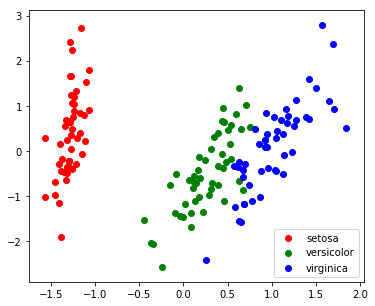

In [88]:
target_ids = range(len(iris.target_names))

from matplotlib import pyplot as plt
plt.figure(figsize=(6, 5))
for i, c, label in zip(target_ids, 'rgbcmykw', iris.target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1],
               c=c, label=label)
plt.legend()

plt.show()

#### Visualization with a non-linear embedding: tSNE

For visualization, more complex embeddings can be useful (for statistical analysis, they are harder to control). sklearn.manifold.TSNE is such a powerful manifold learning method. We apply it to the digits dataset, as the digits are vectors of dimension 8*8 = 64. Embedding them in 2D enables visualization:

In [89]:
# Take the first 500 data points: it's hard to see 1500 points
X = digits.data[:500]
y = digits.target[:500]

# Fit and transform with a TSNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)

X_2d = tsne.fit_transform(X)


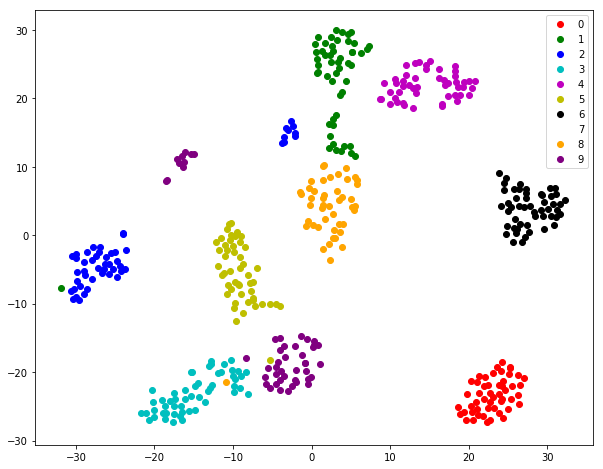

In [90]:
# Visualize the data
plt.figure(figsize=(10, 8))

target_ids = range(len(digits.target_names))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
for i, c, label in zip(target_ids, colors, digits.target_names):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label)
plt.legend()

plt.show()

### The eigenfaces example: chaining PCA and SVMs

The goal of this example is to show how an unsupervised method and a supervised one can be chained for better prediction. It starts with a didactic but lengthy way of doing things, and finishes with the idiomatic approach to pipelining in scikit-learn.

Here we’ll take a look at a simple facial recognition example. Ideally, we would use a dataset consisting of a subset of the Labeled Faces in the Wild data that is available with sklearn.datasets.fetch_lfw_people(). However, this is a relatively large download (~200MB) so we will do the tutorial on a simpler, less rich dataset. Feel free to explore the LFW dataset.

In [91]:
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()
faces.data.shape

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\john\scikit_learn_data


(400, 4096)

In [92]:
faces.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [93]:
faces.DESCR

'Modified Olivetti faces dataset.\n\nThe original database was available from\n\n    http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html\n\nThe version retrieved here comes in MATLAB format from the personal\nweb page of Sam Roweis:\n\n    http://www.cs.nyu.edu/~roweis/\n\nThere are ten different images of each of 40 distinct subjects. For some\nsubjects, the images were taken at different times, varying the lighting,\nfacial expressions (open / closed eyes, smiling / not smiling) and facial\ndetails (glasses / no glasses). All the images were taken against a dark\nhomogeneous background with the subjects in an upright, frontal position (with\ntolerance for some side movement).\n\nThe original dataset consisted of 92 x 112, while the Roweis version\nconsists of 64x64 images.\n'

Let’s visualize these faces to see what we’re working with

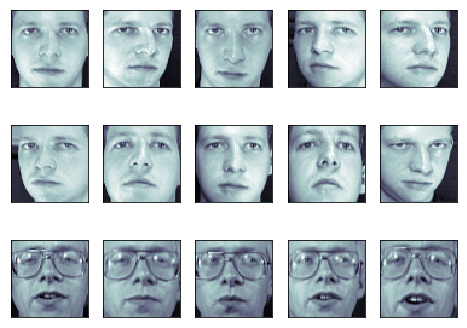

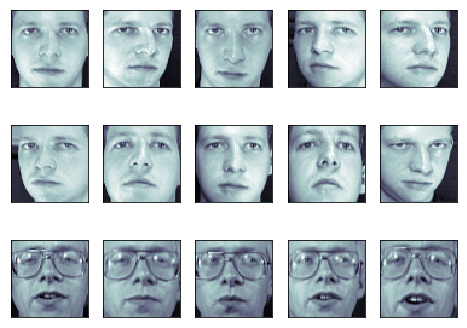

In [95]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(8, 6))

# plot several images
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone)

plt.show()

**Note**

Note is that these faces have already been localized and scaled to a common size. This is an important preprocessing piece for facial recognition, and is a process that can require a large collection of training data. This can be done in scikit-learn, but the challenge is gathering a sufficient amount of training data for the algorithm to work. Fortunately, this piece is common enough that it has been done. One good resource is OpenCV, the Open Computer Vision Library.

We’ll perform a Support Vector classification of the images. We’ll do a typical train-test split on the images:

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data,
        faces.target, random_state=0)

print(X_train.shape, X_test.shape)

(300, 4096) (100, 4096)


#### Preprocessing: Principal Component Analysis

1850 dimensions is a lot for SVM. We can use PCA to reduce these 1850 features to a manageable size, while maintaining most of the information in the dataset.

In [97]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=150, whiten=True)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

One interesting part of PCA is that it computes the “mean” face, which can be interesting to examine:

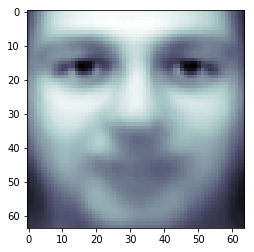

In [99]:
plt.imshow(pca.mean_.reshape(faces.images[0].shape), cmap=plt.cm.bone)

plt.show()

The principal components measure deviations about this mean along orthogonal axes.

In [100]:
print(pca.components_.shape)

(150, 4096)


It is also interesting to visualize these principal components:

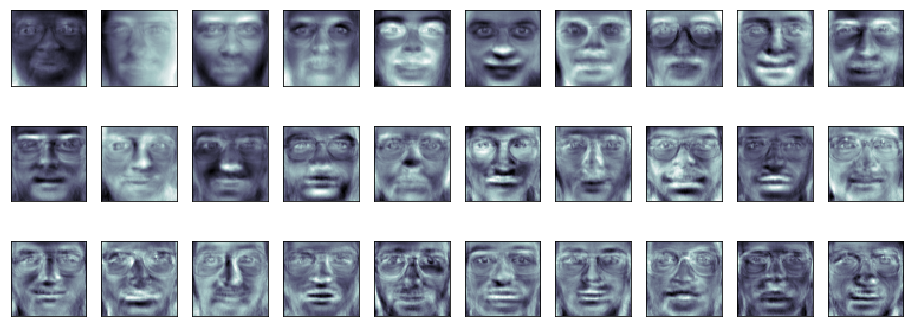

In [101]:
fig = plt.figure(figsize=(16, 6))

for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)

plt.show()

The components (“eigenfaces”) are ordered by their importance from top-left to bottom-right. We see that the first few components seem to primarily take care of lighting conditions; the remaining components pull out certain identifying features: the nose, eyes, eyebrows, etc.

With this projection computed, we can now project our original training and test data onto the PCA basis:

In [102]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)

(300, 150)


In [103]:
print(X_test_pca.shape)

(100, 150)


These projected components correspond to factors in a linear combination of component images such that the combination approaches the original face.

#### Doing the Learning: Support Vector Machines

Now we’ll perform support-vector-machine classification on this reduced dataset:

In [104]:
from sklearn import svm

clf = svm.SVC(C=5., gamma=0.001)
clf.fit(X_train_pca, y_train)

SVC(C=5.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Finally, we can evaluate how well this classification did. First, we might plot a few of the test-cases with the labels learned from the training set:

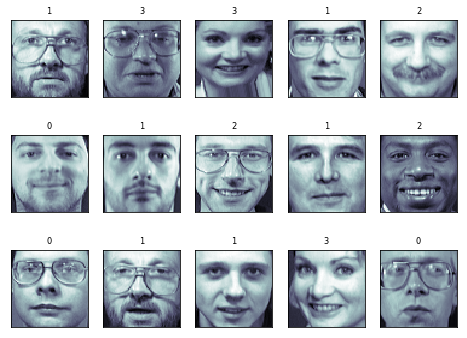

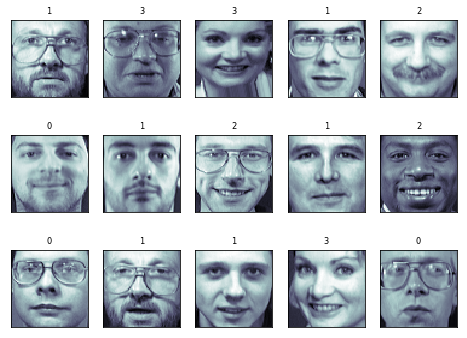

In [106]:
import numpy as np

fig = plt.figure(figsize=(8, 6))

for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)
    y_pred = clf.predict(X_test_pca[i, np.newaxis])[0]
    color = ('black' if y_pred == y_test[i] else 'red')
    ax.set_title(faces.target[y_pred],
                 fontsize='small', color=color)

plt.show()

The classifier is correct on an impressive number of images given the simplicity of its learning model! Using a linear classifier on 150 features derived from the pixel-level data, the algorithm correctly identifies a large number of the people in the images.

Again, we can quantify this effectiveness using one of several measures from sklearn.metrics. First we can do the classification report, which shows the precision, recall and other measures of the “goodness” of the classification:

In [107]:
from sklearn import metrics

y_pred = clf.predict(X_test_pca)
print(metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      0.50      0.67         6
          1       1.00      1.00      1.00         4
          2       0.33      0.50      0.40         2
          3       1.00      1.00      1.00         1
          4       0.33      1.00      0.50         1
          5       1.00      1.00      1.00         5
          6       1.00      1.00      1.00         4
          7       1.00      0.67      0.80         3
          9       1.00      1.00      1.00         1
         10       1.00      1.00      1.00         4
         11       1.00      1.00      1.00         1
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         3
         14       1.00      1.00      1.00         5
         15       0.75      1.00      0.86         3
         17       1.00      1.00      1.00         6
         19       1.00      1.00      1.00         4
         20       0.50      1.00      0.67   

Another interesting metric is the confusion matrix, which indicates how often any two items are mixed-up. The confusion matrix of a perfect classifier would only have nonzero entries on the diagonal, with zeros on the off-diagonal:



In [108]:
np.set_printoptions(threshold=np.nan)
print(metrics.confusion_matrix(y_test, y_pred))

[[3 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

#### Pipelining

Above we used PCA as a pre-processing step before applying our support vector machine classifier. Plugging the output of one estimator directly into the input of a second estimator is a commonly used pattern; for this reason scikit-learn provides a Pipeline object which automates this process. The above problem can be re-expressed as a pipeline as follows:

In [109]:
from sklearn.pipeline import Pipeline
clf = Pipeline([('pca', decomposition.PCA(n_components=150, whiten=True)),
                ('svm', svm.LinearSVC(C=1.0))])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(y_pred, y_test))

[[4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]